In [1]:
import json
import cv2
from PIL import Image
from matplotlib import pyplot
import os
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
image_name = "00048_00"

img_pose = cv2.imread(f"../zalando-hd-resized/train/openpose_img/{image_name}_rendered.png")[:,:,::-1]
img_parse_map = cv2.imread(f"./zalando-hd-resized/train/image-parse-v3/{image_name}.png")[:,:,::-1]
with open(f"./zalando-hd-resized/train/openpose_json/{image_name}_keypoints.json", "r") as f:
    img_pose_json = json.load(f)

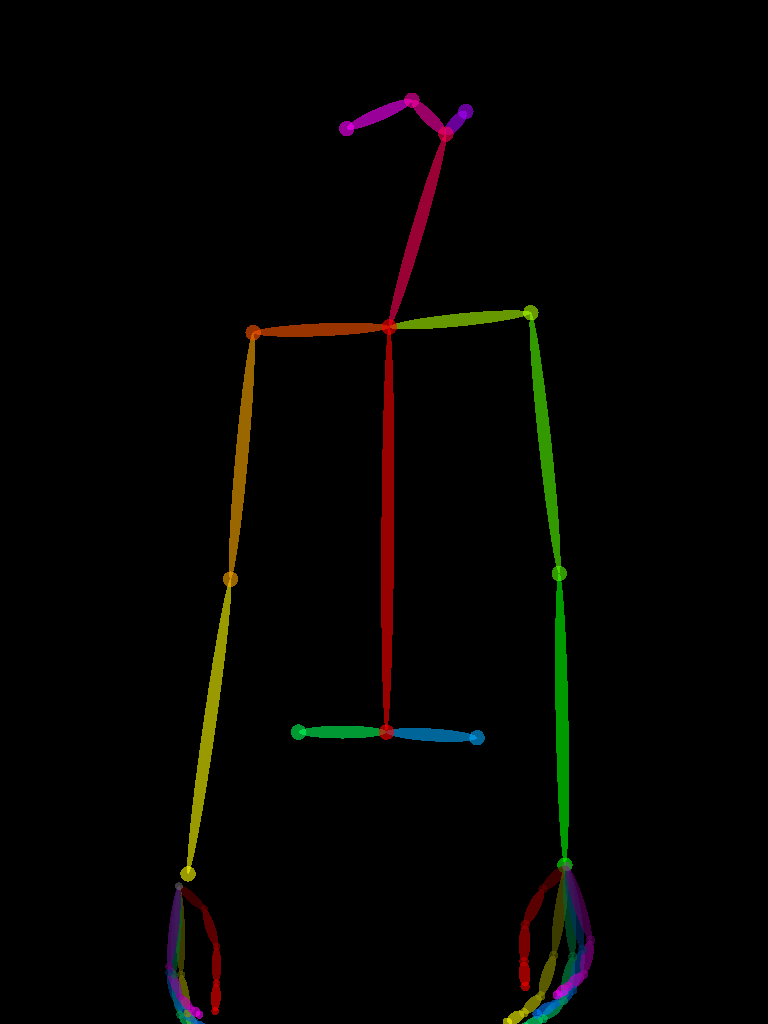

In [3]:
Image.fromarray(img_pose)

In [5]:
x_coordinates = list()
y_coordinates = list()

for i in range(0, len(img_pose_json["people"][0]["pose_keypoints_2d"]), 3):
    x_coordinates.append(img_pose_json["people"][0]["pose_keypoints_2d"][i])

for i in range(1, len(img_pose_json["people"][0]["pose_keypoints_2d"]), 3):
    y_coordinates.append(img_pose_json["people"][0]["pose_keypoints_2d"][i])

In [6]:
im = plt.imread(f"./zalando-hd-resized/train/image/{image_name}.jpg")

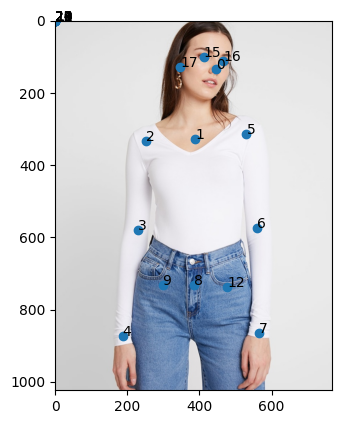

In [7]:
implot = plt.imshow(im)
plt.scatter(x_coordinates, y_coordinates)
for x, y, id in zip(x_coordinates, y_coordinates, range(len(x_coordinates))):
    plt.annotate(id, xy = (x, y))
plt.show()

In [10]:
x_coordinates

[445.352,
 388.751,
 252.647,
 230.015,
 187.548,
 530.341,
 558.722,
 564.416,
 385.852,
 298.015,
 0,
 0,
 476.585,
 0,
 0,
 411.391,
 465.362,
 346.139,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [11]:
y_coordinates

[133.657,
 326.465,
 332.159,
 578.642,
 873.34,
 312.281,
 572.961,
 864.744,
 731.601,
 731.61,
 0,
 0,
 737.257,
 0,
 0,
 99.6869,
 111.044,
 128.095,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [12]:
# garment ids
garment_coordinate_position = [1, 2, 3, 4, 5, 6, 7, 8, 9, 12]

Data Verification - using from data prepared for human pose embeddings

In [13]:
# first run human_pose_embedding.ipynb to generate train_data and test_data text files

with open("./data/train_data.txt", "r") as f:
    lst_train = f.read().split("\n")
with open("./data/test_data.txt", "r") as f:
    lst_test = f.read().split("\n")

In [14]:
def load_json(json_file_path):
    with open(json_file_path, "r") as f:
        img_pose_json = json.load(f)
    return img_pose_json

In [15]:
# using the 10 garment coordinates as it is as in human pose. 
def create_data(lst_files, json_folder_path, garment_coordinate_position, save_path):
    files = os.listdir(json_folder_path)
    for file in lst_files:
        file_name = f"{file}_keypoints.json"
        file_path = os.path.join(json_folder_path, file_name)
        if file_name in files:
            dct = load_json(file_path)
            lst = dct["people"][0]["pose_keypoints_2d"]
            del lst[2::3]
            x_lst = [lst[i] for i in range(0, len(lst), 2)]
            y_lst = [lst[i] for i in range(1, len(lst), 2)]
            x_garment = [x_lst[i] for i in garment_coordinate_position]
            y_garment = [y_lst[i] for i in garment_coordinate_position]
            result = [None]*(len(x_garment)+len(y_garment))
            result[::2] = x_garment
            result[1::2] = y_garment
            with open(os.path.join(save_path, file_name), "w") as f:
                json.dump(result, f)

In [16]:
json_test_folder = "./zalando-hd-resized/test/openpose_json/"
json_train_folder = "./zalando-hd-resized/train/openpose_json/"

In [17]:
create_data(lst_train, json_train_folder, garment_coordinate_position, "./data/train/")

In [18]:
create_data(lst_test, json_test_folder, garment_coordinate_position, "./data/test/")

### test prepared data

In [33]:
dct_created_data = load_json("./data/train/00048_00_keypoints.json")

In [34]:
dct_created_data

[388.751,
 326.465,
 252.647,
 332.159,
 230.015,
 578.642,
 187.548,
 873.34,
 530.341,
 312.281,
 558.722,
 572.961,
 564.416,
 864.744,
 385.852,
 731.601,
 298.015,
 731.61,
 476.585,
 737.257]

In [35]:
dct_original_data = load_json("./zalando-hd-resized/train/openpose_json/00048_00_keypoints.json")

In [36]:
im = plt.imread(f"./zalando-hd-resized/train/image/00048_00.jpg")

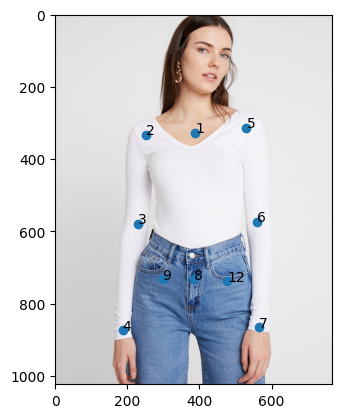

In [37]:
x_coordinates_new = dct_created_data[0::2]
y_coordinates_new = dct_created_data[1::2]

implot = plt.imshow(im)
plt.scatter(x_coordinates_new, y_coordinates_new)
for x, y, id in zip(x_coordinates_new, y_coordinates_new, garment_coordinate_position):
    plt.annotate(id, xy = (x, y))
plt.show()